In [ ]:
#Base de dados Kaggle
https://www.kaggle.com/code/umasharma11/influencers-analysis-for-business-purpose

In [ ]:
import pandas as pd

# Carregar os arquivos CSV
df_instagram = pd.read_csv('social media influencers - instagram.csv')
df_youtube = pd.read_csv('social media influencers - youtube.csv')
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Exibir as primeiras linhas para verificar os dados
df_instagram.head()
df_youtube.head()
df_instagram2.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\n,Engagement avg\n,Brazilian,Gender
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K,NaN,NaN
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K,NaN,NaN
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K,NaN,NaN
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M,NaN,NaN
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M,NaN,NaN


In [ ]:
import pandas as pd

# Desabilitar a notação científica no pandas
pd.options.display.float_format = '{:,.2f}'.format

# Carregar os arquivos CSV
df_instagram = pd.read_csv('social media influencers - instagram.csv')
df_youtube = pd.read_csv('social media influencers - youtube.csv')

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None  # Caso haja valores inválidos, retorna None

# Aplicando a função para converter os valores de 'Authentic engagement' no Instagram
df_instagram['Authentic engagement\r\n'] = df_instagram['Authentic engagement\r\n'].apply(convert_to_numeric)

# Aplicando a mesma função para converter os valores no YouTube (visualizações, curtidas e comentários)
df_youtube['avg views'] = df_youtube['avg views'].apply(convert_to_numeric)
df_youtube['avg likes'] = df_youtube['avg likes'].apply(convert_to_numeric)
df_youtube['avg comments'] = df_youtube['avg comments'].apply(convert_to_numeric)

# **Filtrando para o público brasileiro (Instagram e YouTube)**

# Instagram: filtrando apenas influenciadores com maior audiência no Brasil
df_instagram_brazil = df_instagram[df_instagram['Audience country(mostly)'] == 'Brazil']

# **Análise do Instagram**

# Agrupando por categoria e calculando a média de "Authentic engagement"
instagram_grouped_brazil = df_instagram_brazil.groupby('category_1')['Authentic engagement\r\n'].mean()

# Remover NaNs antes de ordenar
instagram_grouped_brazil = instagram_grouped_brazil.dropna()

# Ordenando as categorias por maior engajamento no Instagram
instagram_grouped_brazil_sorted = instagram_grouped_brazil.sort_values(ascending=False)

# Melhorando a visualização da tabela do Instagram
instagram_table = pd.DataFrame(instagram_grouped_brazil_sorted).reset_index()
instagram_table.columns = ['Categoria', 'Engajamento Autêntico (Média)']

# Exibindo a tabela do Instagram
print("Conteúdos mais relevantes no Instagram (Brasil):")
print(instagram_table.to_string(index=False))

# **Análise do YouTube**

# Calculando o engajamento somando visualizações, curtidas e comentários no YouTube
df_youtube_brazil = df_youtube[df_youtube['Audience Country'] == 'Brazil']
df_youtube_brazil['YouTube Engagement'] = df_youtube_brazil['avg views'] + df_youtube_brazil['avg likes'] + df_youtube_brazil['avg comments']

# Remover NaNs antes de ordenar
#df_youtube_brazil = df_youtube_brazil.dropna(subset=['YouTube Engagement'])

# Agrupando por categoria e calculando a média de engajamento no YouTube
youtube_grouped_brazil = df_youtube_brazil.groupby('Category')['YouTube Engagement'].mean()

# Ordenando as categorias por maior engajamento no YouTube
youtube_grouped_brazil_sorted = youtube_grouped_brazil.sort_values(ascending=False)

# Melhorando a visualização da tabela do YouTube
youtube_table = pd.DataFrame(youtube_grouped_brazil_sorted).reset_index()
youtube_table.columns = ['Categoria', 'Engajamento no YouTube (Média)']

# Exibindo a tabela do YouTube
print("\nConteúdos mais relevantes no YouTube (Brasil):")
print(youtube_table.to_string(index=False))


Conteúdos mais relevantes no Instagram (Brasil):
                Categoria  Engajamento Autêntico (Média)
   Management & Marketing                   1,800,000.00
            Racing Sports                     819,900.00
Cinema & Actors/actresses                     560,611.43
                    Music                     503,477.78
                    Shows                     433,225.00
                 Modeling                     403,400.00
       Sports with a ball                     350,918.75
  Humor & Fun & Happiness                     322,366.67
                Lifestyle                     286,955.56
            Adult content                     212,900.00
  Literature & Journalism                     162,200.00
              Art/Artists                     160,200.00
      Finance & Economics                     150,900.00
                   Beauty                     138,360.00
                  Fashion                      46,200.00

Conteúdos mais relevantes no YouTube (

<ipython-input-11-c9e0ca794c9f>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_brazil['YouTube Engagement'] = df_youtube_brazil['avg views'] + df_youtube_brazil['avg likes'] + df_youtube_brazil['avg comments']


In [ ]:
import pandas as pd

# Desabilitar a notação científica no pandas
pd.options.display.float_format = '{:,.2f}'.format

# Carregar os arquivos CSV
df_instagram = pd.read_csv('social media influencers - instagram.csv')
df_youtube = pd.read_csv('social media influencers - youtube.csv')

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None  # Caso haja valores inválidos, retorna None

# Aplicando a função para converter os valores de 'Authentic engagement' no Instagram
df_instagram['Authentic engagement\r\n'] = df_instagram['Authentic engagement\r\n'].apply(convert_to_numeric)

# Aplicando a mesma função para converter os valores no YouTube (visualizações, curtidas e comentários)
df_youtube['avg views'] = df_youtube['avg views'].apply(convert_to_numeric)
df_youtube['avg likes'] = df_youtube['avg likes'].apply(convert_to_numeric)
df_youtube['avg comments'] = df_youtube['avg comments'].apply(convert_to_numeric)

# **Filtrando para o público brasileiro (Instagram e YouTube)**

# Instagram: filtrando apenas influenciadores com maior audiência no Brasil
df_instagram_brazil = df_instagram[df_instagram['Audience country(mostly)'] == 'Brazil']

# **Análise do Instagram**

# Agrupando por categoria e somando o engajamento total no Instagram
instagram_grouped_brazil = df_instagram_brazil.groupby('category_1')['Authentic engagement\r\n'].sum()

# Ordenando as categorias por maior engajamento no Instagram
instagram_grouped_brazil_sorted = instagram_grouped_brazil.sort_values(ascending=False)

# Melhorando a visualização da tabela do Instagram
instagram_table = pd.DataFrame(instagram_grouped_brazil_sorted).reset_index()
instagram_table.columns = ['Categoria', 'Engajamento Autêntico (Total)']

# Exibindo a tabela dos 10 maiores engajamentos no Instagram
print("10 maiores categorias com engajamento autêntico no Instagram (Brasil):")
print(instagram_table.head(10).to_string(index=False))

# **Análise do YouTube**

# Calculando o engajamento somando visualizações, curtidas e comentários no YouTube
df_youtube_brazil = df_youtube[df_youtube['Audience Country'] == 'Brazil']
df_youtube_brazil.loc[:, 'YouTube Engagement'] = df_youtube_brazil['avg views'] + df_youtube_brazil['avg likes'] + df_youtube_brazil['avg comments']

# Remover NaNs antes de agrupar
df_youtube_brazil = df_youtube_brazil.dropna(subset=['YouTube Engagement'])

# Agrupando por categoria e somando o engajamento total no YouTube
youtube_grouped_brazil = df_youtube_brazil.groupby('Category')['YouTube Engagement'].sum()

# Ordenando as categorias por maior engajamento no YouTube
youtube_grouped_brazil_sorted = youtube_grouped_brazil.sort_values(ascending=False)

# Melhorando a visualização da tabela do YouTube
youtube_table = pd.DataFrame(youtube_grouped_brazil_sorted).reset_index()
youtube_table.columns = ['Categoria', 'Engajamento no YouTube (Total)']

# Exibindo a tabela dos 10 maiores engajamentos no YouTube
print("\n10 maiores categorias com engajamento no YouTube (Brasil):")
print(youtube_table.head(10).to_string(index=False))



10 maiores categorias com engajamento autêntico no Instagram (Brasil):
                Categoria  Engajamento Autêntico (Total)
Cinema & Actors/actresses                  19,621,400.00
                    Music                  18,125,200.00
       Sports with a ball                   5,614,700.00
                Lifestyle                   5,165,200.00
                    Shows                   3,465,800.00
                 Modeling                   2,823,800.00
  Humor & Fun & Happiness                   1,934,200.00
   Management & Marketing                   1,800,000.00
            Racing Sports                     819,900.00
                   Beauty                     691,800.00

10 maiores categorias com engajamento no YouTube (Brasil):
           Categoria  Engajamento no YouTube (Total)
       Music & Dance                   16,556,937.00
                Toys                    6,575,364.00
           Animation                    3,367,965.00
              Movies          

<ipython-input-15-4fad6f70d4bc>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_brazil.loc[:, 'YouTube Engagement'] = df_youtube_brazil['avg views'] + df_youtube_brazil['avg likes'] + df_youtube_brazil['avg comments']


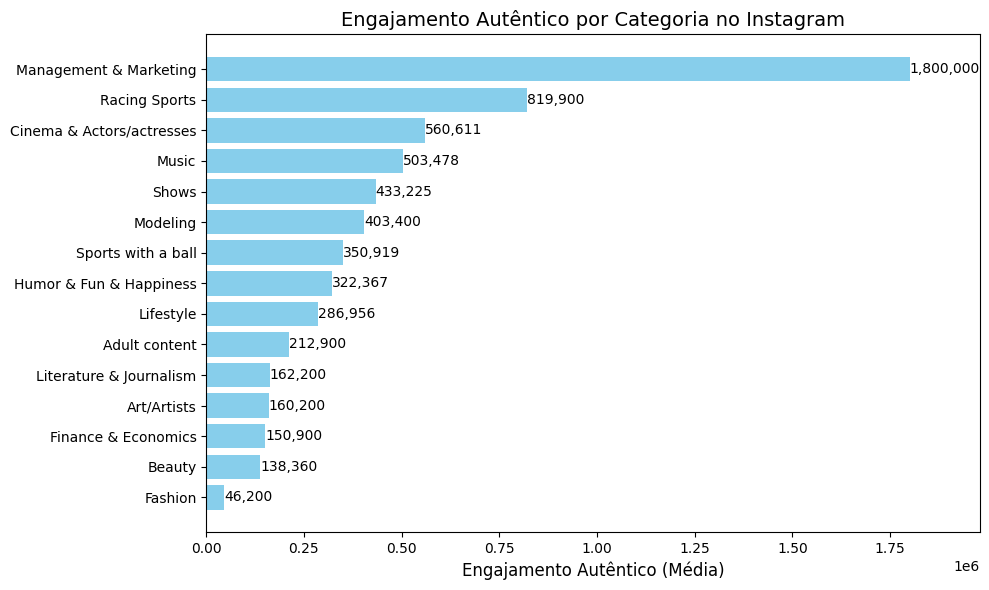

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de engajamento no Instagram com ajuste de escala
plt.figure(figsize=(10, 6))
plt.barh(instagram_table['Categoria'], instagram_table['Engajamento Autêntico (Média)'], color='skyblue')

# Adicionar rótulo no eixo X sem notação científica
plt.xlabel('Engajamento Autêntico (Média)', fontsize=12)
plt.title('Engajamento Autêntico por Categoria no Instagram', fontsize=14)

# Adicionar os valores de engajamento nas barras
for index, value in enumerate(instagram_table['Engajamento Autêntico (Média)']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=10)

# Ajustar os limites do eixo X para evitar a sobreposição com os valores nas barras
plt.xlim(0, max(instagram_table['Engajamento Autêntico (Média)']) * 1.1)

# Inverter o eixo Y para mostrar as categorias de maior engajamento no topo
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



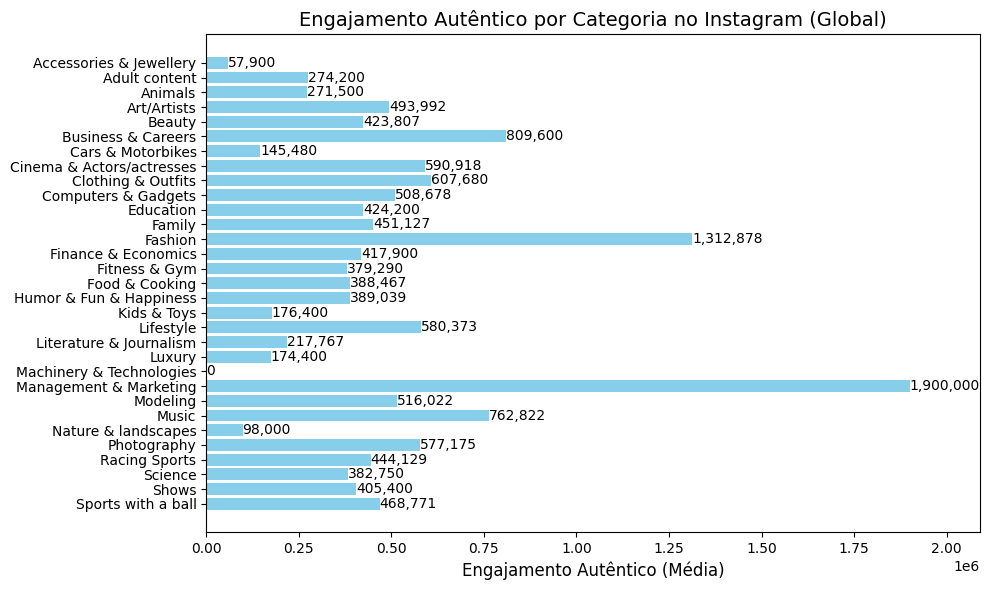

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os arquivos CSV, assumindo que df_instagram2 é o DataFrame com todos os dados
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None

# Aplicar a conversão para 'Authentic engagement'
df_instagram2['Authentic engagement\n'] = df_instagram2['Authentic engagement\n'].apply(convert_to_numeric)

# Agrupar por categoria e calcular a média de "Authentic engagement"
instagram_grouped_all = df_instagram2.groupby('category_1')['Authentic engagement\n'].mean()

# Remover NaNs antes de ordenar
instagram_grouped_all = instagram_grouped_all.dropna()

# Ordenar as categorias por maior engajamento
instagram_table = pd.DataFrame(instagram_grouped_all).reset_index()
instagram_table.columns = ['Categoria', 'Engajamento Autêntico (Média)']

# Criar o gráfico de engajamento no Instagram com ajuste de escala
plt.figure(figsize=(10, 6))
plt.barh(instagram_table['Categoria'], instagram_table['Engajamento Autêntico (Média)'], color='skyblue')

# Adicionar rótulo no eixo X sem notação científica
plt.xlabel('Engajamento Autêntico (Média)', fontsize=12)
plt.title('Engajamento Autêntico por Categoria no Instagram (Global)', fontsize=14)

# Adicionar os valores de engajamento nas barras
for index, value in enumerate(instagram_table['Engajamento Autêntico (Média)']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=10)

# Ajustar os limites do eixo X para evitar a sobreposição com os valores nas barras
plt.xlim(0, max(instagram_table['Engajamento Autêntico (Média)']) * 1.1)

# Inverter o eixo Y para mostrar as categorias de maior engajamento no topo
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Gráfico de engajamento no YouTube com ajuste de escala
plt.figure(figsize=(10, 6))
plt.barh(youtube_table['Categoria'], youtube_table['Engajamento no YouTube (Média)'], color='lightgreen')

# Adicionar rótulo no eixo X sem notação científica
plt.xlabel('Engajamento no YouTube (Média)', fontsize=12)
plt.title('Engajamento por Categoria no YouTube', fontsize=14)

# Adicionar os valores de engajamento nas barras
for index, value in enumerate(youtube_table['Engajamento no YouTube (Média)']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=10)

# Ajustar os limites do eixo X para evitar a sobreposição com os valores nas barras
plt.xlim(0, max(youtube_table['Engajamento no YouTube (Média)']) * 1.1)

# Inverter o eixo Y para mostrar as categorias de maior engajamento no topo
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


KeyError: 'Engajamento no YouTube (Média)'

<Figure size 1000x600 with 0 Axes>

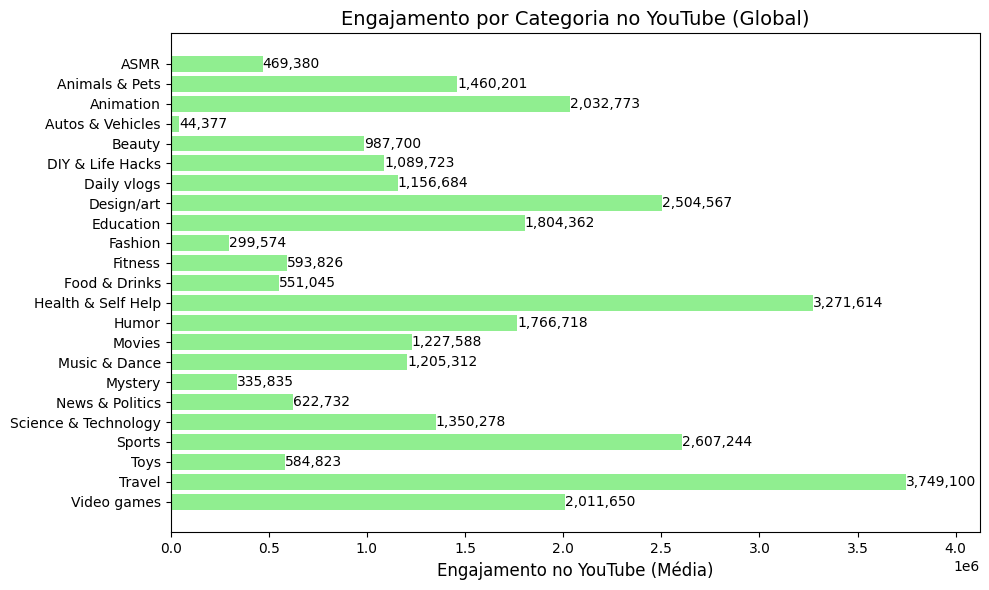

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV do YouTube
df_youtube = pd.read_csv('social media influencers - youtube.csv')

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None

# Aplicar a função para converter os valores de visualizações, curtidas e comentários no YouTube
df_youtube['avg views'] = df_youtube['avg views'].apply(convert_to_numeric)
df_youtube['avg likes'] = df_youtube['avg likes'].apply(convert_to_numeric)
df_youtube['avg comments'] = df_youtube['avg comments'].apply(convert_to_numeric)

# Calcular o engajamento total (visualizações + curtidas + comentários)
df_youtube['YouTube Engagement'] = df_youtube['avg views'] + df_youtube['avg likes'] + df_youtube['avg comments']

# Agrupar por categoria e calcular a média de engajamento no YouTube
youtube_grouped_all = df_youtube.groupby('Category')['YouTube Engagement'].mean()

# Remover NaNs antes de ordenar
youtube_grouped_all = youtube_grouped_all.dropna()

# Criar tabela com as categorias e o engajamento médio
youtube_table = pd.DataFrame(youtube_grouped_all).reset_index()
youtube_table.columns = ['Categoria', 'Engajamento no YouTube (Média)']

# Gráfico de engajamento no YouTube com ajuste de escala
plt.figure(figsize=(10, 6))
plt.barh(youtube_table['Categoria'], youtube_table['Engajamento no YouTube (Média)'], color='lightgreen')

# Adicionar rótulo no eixo X sem notação científica
plt.xlabel('Engajamento no YouTube (Média)', fontsize=12)
plt.title('Engajamento por Categoria no YouTube (Global)', fontsize=14)

# Adicionar os valores de engajamento nas barras
for index, value in enumerate(youtube_table['Engajamento no YouTube (Média)']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=10)

# Ajustar os limites do eixo X para evitar a sobreposição com os valores nas barras
plt.xlim(0, max(youtube_table['Engajamento no YouTube (Média)']) * 1.1)

# Inverter o eixo Y para mostrar as categorias de maior engajamento no topo
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
##Filtrar influenciadores do Brasil no Instagram.
##Selecionar os top influenciadores por categoria, ordenando pelo engajamento autêntico.
##Exibir o nome dos influenciadores e o engajamento de cada categoria.

import pandas as pd

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None  # Caso haja valores inválidos, retorna None

# Carregar o arquivo CSV
df_instagram = pd.read_csv('social media influencers - instagram.csv')

# Aplicar a conversão para o campo de "Authentic engagement"
df_instagram['Authentic engagement\r\n'] = df_instagram['Authentic engagement\r\n'].apply(convert_to_numeric)

# Filtrar apenas influenciadores cujo público é majoritariamente do Brasil
df_instagram_brazil = df_instagram[df_instagram['Audience country(mostly)'] == 'Brazil']

# Ordenar os influenciadores por engajamento autêntico
df_instagram_brazil_sorted = df_instagram_brazil.sort_values(by='Authentic engagement\r\n', ascending=False)

# Agrupar por categoria e pegar o top influenciador por categoria
top_influencers_grouped = df_instagram_brazil_sorted.groupby('category_1').head(1)[['category_1', 'Influencer insta name', 'Authentic engagement\r\n']]

# Renomear colunas para uma exibição clara
top_influencers_grouped.columns = ['Categoria', 'Influenciador', 'Engajamento Autêntico']

# Filtrar influenciadores cujo nome não seja NaN
top_influencers_grouped_valid = top_influencers_grouped.dropna(subset=['Influenciador'])

# Exibir os top influenciadores por categoria com nomes válidos
print(top_influencers_grouped_valid)




                     Categoria                 Influenciador  \
345                      Music                   harrystyles   
631  Cinema & Actors/actresses              milliebobbybrown   
456     Management & Marketing  jungkook_bighitentertainment   
676         Sports with a ball                      neymarjr   
945                      Shows                      virginia   
798                   Modeling                    sadiesink_   
952    Humor & Fun & Happiness              whinderssonnunes   
537              Racing Sports                 lewishamilton   
375                  Lifestyle     iammichelemorroneofficial   
176                Art/Artists                     chaelincl   
230    Literature & Journalism                 deiveleonardo   
853              Adult content                      soyneiva   
163                     Beauty                camilladelucas   
405        Finance & Economics          jairmessiasbolsonaro   
562                    Fashion          

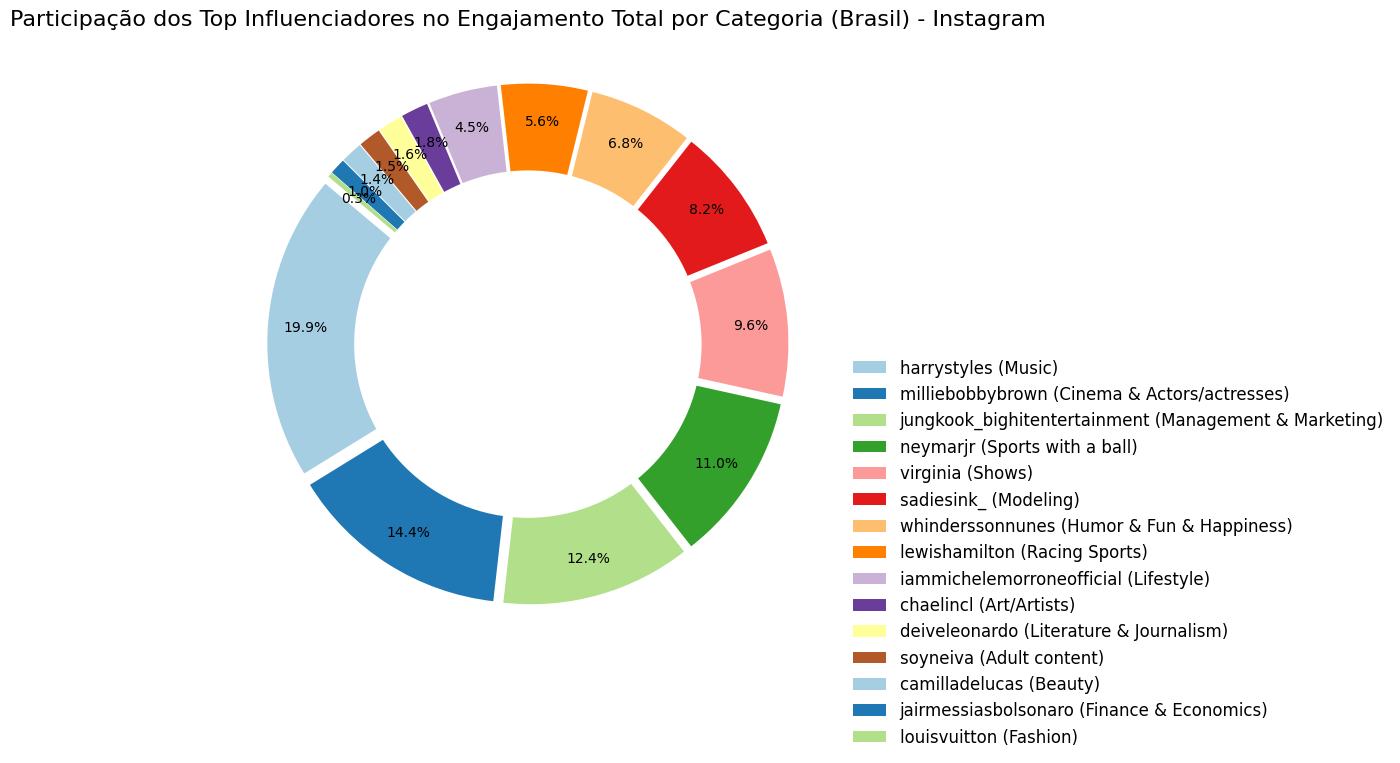

In [ ]:
import matplotlib.pyplot as plt

# Preparar os dados para o gráfico de pizza
labels = [f'{influencer} ({category})' for influencer, category in zip(top_influencers_grouped_valid['Influenciador'], top_influencers_grouped_valid['Categoria'])]
engagement = top_influencers_grouped_valid['Engajamento Autêntico']

# Definir explosão para destacar as fatias (um pequeno ajuste para todas as fatias)
explode = [0.05] * len(engagement)  # Ajuste o valor para mais espaço entre as fatias

# Criar o gráfico de pizza maior com rótulos externos e linhas
plt.figure(figsize=(12, 12))  # Reduzindo o tamanho da figura
plt.pie(engagement, labels=None, autopct='%1.1f%%', startangle=140, explode=explode, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Adicionar os rótulos com linhas externas
plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=False)

# Desenhar um círculo para deixar o gráfico mais "donut-like" e os rótulos mais distantes
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adicionar título
plt.title('Participação dos Top Influenciadores no Engajamento Total por Categoria (Brasil) - Instagram', fontsize=16)

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None  # Caso haja valores inválidos, retorna None

# Aplicar a conversão para os campos de "avg views", "avg likes", "avg comments"
df_youtube['avg views'] = df_youtube['avg views'].apply(convert_to_numeric)
df_youtube['avg likes'] = df_youtube['avg likes'].apply(convert_to_numeric)
df_youtube['avg comments'] = df_youtube['avg comments'].apply(convert_to_numeric)

# Calculando o engajamento total no YouTube (soma de visualizações, curtidas e comentários)
df_youtube['YouTube Engagement'] = df_youtube['avg views'] + df_youtube['avg likes'] + df_youtube['avg comments']

# Filtrar apenas influenciadores cujo público é majoritariamente do Brasil
df_youtube_brazil = df_youtube[df_youtube['Audience Country'] == 'Brazil']

# Ordenar os influenciadores por engajamento no YouTube
df_youtube_brazil_sorted = df_youtube_brazil.sort_values(by='YouTube Engagement', ascending=False)

# Agrupar por categoria e pegar o top influenciador por categoria
top_influencers_youtube = df_youtube_brazil_sorted.groupby('Category').head(1)[['Category', 'channel name', 'YouTube Engagement']]

# Renomear colunas para uma exibição clara
top_influencers_youtube.columns = ['Categoria', 'Influenciador', 'Engajamento no YouTube']

# Filtrar influenciadores cujo nome não seja NaN
top_influencers_youtube_valid = top_influencers_youtube.dropna(subset=['Influenciador'])

# Exibir os top influenciadores por categoria com nomes válidos
print(top_influencers_youtube_valid)



                Categoria        Influenciador  Engajamento no YouTube
409         Music & Dance  Zé Neto e Cristiano               5344643.0
751                Movies          Games EduUu               1725800.0
346                  Toys         DUDU e CAROL               1466042.0
249             Animation     Robin Hood Gamer               1360100.0
420           Daily vlogs                T3ddy               1245700.0
713            Design/art        Coisa de Nerd               1229800.0
191                Sports         CanalCanalha               1229500.0
518                 Humor         Everson Zoio                713900.0
326           Video games          Rafa & Luiz                620300.0
334  Science & Technology      Manual do Mundo                559340.0
440         Food & Drinks        Camila Loures                339056.0
778               Fashion       Franciny Ehlke                217029.0
465      Autos & Vehicles             MAIKI021                 44377.0
547   

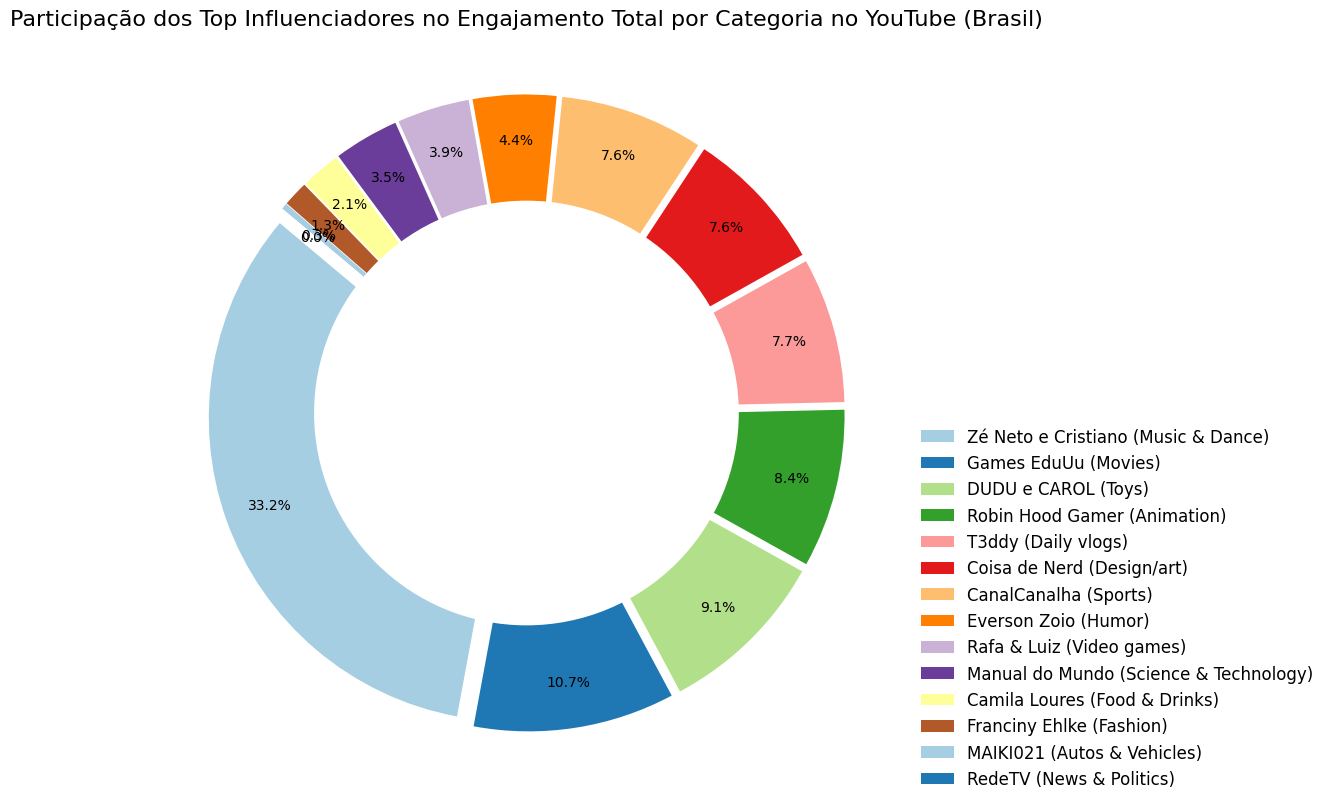

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV do YouTube
df_youtube = pd.read_csv('social media influencers - youtube.csv')

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None  # Caso haja valores inválidos, retorna None

# Aplicar a conversão para os campos de "avg views", "avg likes", "avg comments"
df_youtube['avg views'] = df_youtube['avg views'].apply(convert_to_numeric)
df_youtube['avg likes'] = df_youtube['avg likes'].apply(convert_to_numeric)
df_youtube['avg comments'] = df_youtube['avg comments'].apply(convert_to_numeric)

# Calculando o engajamento total no YouTube (soma de visualizações, curtidas e comentários)
df_youtube['YouTube Engagement'] = df_youtube['avg views'] + df_youtube['avg likes'] + df_youtube['avg comments']

# Remover linhas com valores NaN no engajamento
df_youtube = df_youtube.dropna(subset=['YouTube Engagement'])

# Filtrar apenas influenciadores cujo público é majoritariamente do Brasil
df_youtube_brazil = df_youtube[df_youtube['Audience Country'] == 'Brazil']

# Ordenar os influenciadores por engajamento no YouTube
df_youtube_brazil_sorted = df_youtube_brazil.sort_values(by='YouTube Engagement', ascending=False)

# Agrupar por categoria e pegar o top influenciador por categoria
top_influencers_youtube = df_youtube_brazil_sorted.groupby('Category').head(1)[['Category', 'channel name', 'YouTube Engagement']]

# Renomear colunas para uma exibição clara
top_influencers_youtube.columns = ['Categoria', 'Influenciador', 'Engajamento no YouTube']

# Filtrar influenciadores cujo nome não seja NaN
top_influencers_youtube_valid = top_influencers_youtube.dropna(subset=['Influenciador'])

# Preparar os dados para o gráfico de pizza
labels = [f'{influencer} ({category})' for influencer, category in zip(top_influencers_youtube_valid['Influenciador'], top_influencers_youtube_valid['Categoria'])]
engagement = top_influencers_youtube_valid['Engajamento no YouTube']

# Definir explosão para destacar as fatias (um pequeno ajuste para todas as fatias)
explode = [0.05] * len(engagement)  # Ajuste o valor para mais espaço entre as fatias

# Criar o gráfico de pizza menor com rótulos externos e linhas
plt.figure(figsize=(12, 12))  # Reduzindo o tamanho da figura para 12x12
plt.pie(engagement, labels=None, autopct='%1.1f%%', startangle=140, explode=explode, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Adicionar os rótulos com linhas externas
plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=False)

# Desenhar um círculo para deixar o gráfico mais "donut-like" e os rótulos mais distantes
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adicionar título
plt.title('Participação dos Top Influenciadores no Engajamento Total por Categoria no YouTube (Brasil)', fontsize=16)

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None  # Caso haja valores inválidos, retorna None

# Carregar o arquivo CSV df_instagram2
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Renomear a coluna 'Authentic engagement\n' para 'Authentic engagement'
df_instagram2 = df_instagram2.rename(columns={'Authentic engagement\n': 'Authentic engagement'})

# Filtrar todas as contas cujo público é majoritariamente do Brasil
df_instagram_brazil = df_instagram2[df_instagram2['Audience country(mostly)'] == 'Brazil']

# Aplicar a função de conversão de valores para 'Authentic engagement'
df_instagram_brazil['Authentic engagement'] = df_instagram_brazil['Authentic engagement'].apply(convert_to_numeric)

# Ordenar as contas pelo maior 'Authentic engagement'
df_instagram_brazil_sorted = df_instagram_brazil.sort_values(by='Authentic engagement', ascending=False)

# Exibir apenas o nome das contas, nome do influenciador, e o engajamento autêntico
account_names_sorted = df_instagram_brazil_sorted[['instagram name', 'Influencer insta name', 'Authentic engagement']]

# Ajustar o pandas para exibir todas as linhas
pd.set_option('display.max_rows', None)

# Exibir o resultado
print(account_names_sorted)







                     instagram name         Influencer insta name  \
345                             NaN                   harrystyles   
880                    Taylor Swift                   taylorswift   
631              Millie Bobby Brown              milliebobbybrown   
926              Úrsula Corberó ✨                    ursulolita   
456          JUNGKOOK (전정국) Updates  jungkook_bighitentertainment   
676                           NJ 🇧🇷                      neymarjr   
419                Jennifer Aniston               jenniferaniston   
542                   Lili Reinhart                  lilireinhart   
945          Virginia Fonseca Costa                      virginia   
691                    Noah Schnapp                   noahschnapp   
798                      Sadie Sink                    sadiesink_   
165                   camila mendes                    camimendes   
561                 Louis Tomlinson                      louist91   
796               Sabrina Carpente

<ipython-input-9-b12a95596ac6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instagram_brazil['Authentic engagement'] = df_instagram_brazil['Authentic engagement'].apply(convert_to_numeric)


In [ ]:
import pandas as pd

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None  # Caso haja valores inválidos, retorna None

# Carregar o arquivo CSV df_instagram2
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Renomear a coluna 'Authentic engagement\n' para 'Authentic engagement'
df_instagram2 = df_instagram2.rename(columns={'Authentic engagement\n': 'Authentic engagement'})

# Filtrar todas as contas cujo público é majoritariamente do Brasil
df_instagram_brazil = df_instagram2[df_instagram2['Audience country(mostly)'] == 'Brazil']

# Aplicar a função de conversão de valores para 'Authentic engagement'
df_instagram_brazil['Authentic engagement'] = df_instagram_brazil['Authentic engagement'].apply(convert_to_numeric)

# Ordenar as contas pelo maior 'Authentic engagement'
df_instagram_brazil_sorted = df_instagram_brazil.sort_values(by='Authentic engagement', ascending=False)

# Exibir apenas o nome das contas, nome do influenciador, e o engajamento autêntico
account_names_sorted = df_instagram_brazil_sorted[['instagram name', 'Influencer insta name', 'Authentic engagement', 'Brazilian']]

# Filtrar influenciadores brasileiros
influencers_brazilian = account_names_sorted[account_names_sorted['Brazilian'] == 'Y']

# Filtrar influenciadores não brasileiros
influencers_non_brazilian = account_names_sorted[account_names_sorted['Brazilian'] == 'N']

# Ajustar o pandas para exibir todas as linhas
pd.set_option('display.max_rows', None)

# Exibir o resultado para brasileiros
print("Influenciadores Brasileiros:")
print(influencers_brazilian)

# Exibir o resultado para não brasileiros
print("\nInfluenciadores Não Brasileiros:")
print(influencers_non_brazilian)


Influenciadores Brasileiros:
                instagram name Influencer insta name  Authentic engagement  \
676                      NJ 🇧🇷              neymarjr             1600000.0   
945     Virginia Fonseca Costa              virginia             1400000.0   
952          Whindersson Nunes      whinderssonnunes              988300.0   
573              Iran Ferreira        luvadepedreiro              910400.0   
940          Vinicius Jr. ⚡️🇧🇷                vinijr              909400.0   
522               Lara Silva 💦             larasilva              789000.0   
596                Maria Alice            mariaalice              673400.0   
68                    Anitta 🎤                anitta              542800.0   
560             Victor Augusto           loud_victor              511200.0   
150           Bruna Marquezine       brunamarquezine              485200.0   
875               Tainá Costa                 taina              478300.0   
724          Philippe Coutinho     

<ipython-input-12-26c028b7e30f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instagram_brazil['Authentic engagement'] = df_instagram_brazil['Authentic engagement'].apply(convert_to_numeric)


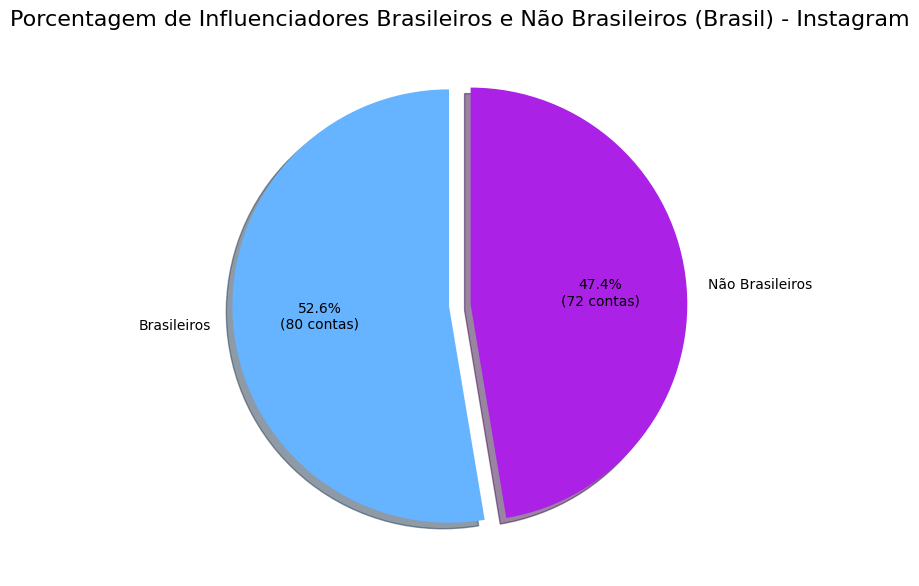

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV df_instagram2
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Renomear a coluna 'Authentic engagement\n' para 'Authentic engagement'
df_instagram2 = df_instagram2.rename(columns={'Authentic engagement\n': 'Authentic engagement'})

# Filtrar todas as contas cujo público é majoritariamente do Brasil
df_instagram_brazil = df_instagram2[df_instagram2['Audience country(mostly)'] == 'Brazil']

# Contar quantos são brasileiros e quantos não são
brazilian_count = df_instagram_brazil[df_instagram_brazil['Brazilian'] == 'Y'].shape[0]
non_brazilian_count = df_instagram_brazil[df_instagram_brazil['Brazilian'] == 'N'].shape[0]

# Dados para o gráfico de pizza
labels = ['Brasileiros', 'Não Brasileiros']
sizes = [brazilian_count, non_brazilian_count]
colors = ['#66b3ff', '#ac21e6']  # Cores para as fatias
explode = (0.05, 0.05)  # Destacar ambas as fatias

# Função para mostrar quantidade e porcentagem no gráfico de pizza
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute} contas)'

# Criar o gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes), startangle=90, shadow=True)

# Adicionar título
plt.title('Porcentagem de Influenciadores Brasileiros e Não Brasileiros (Brasil) - Instagram', fontsize=16)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


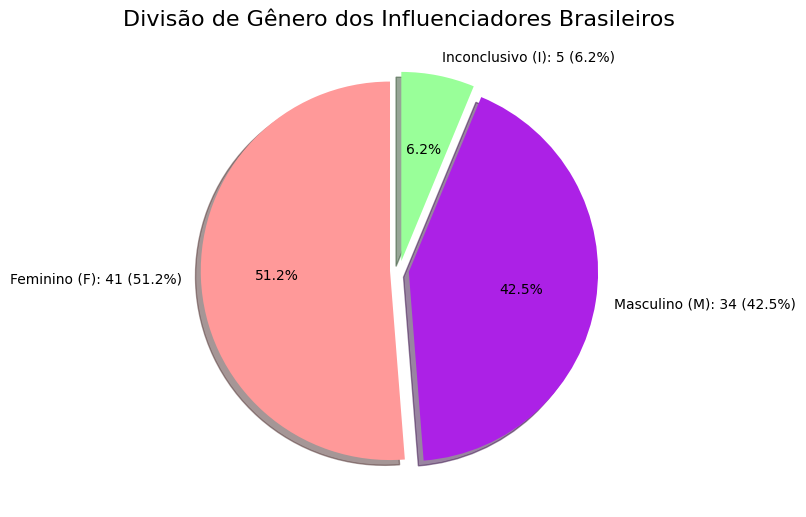

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV df_instagram2
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Renomear a coluna 'Authentic engagement\n' para 'Authentic engagement'
df_instagram2 = df_instagram2.rename(columns={'Authentic engagement\n': 'Authentic engagement'})

# Filtrar todas as contas cujo público é majoritariamente do Brasil e são brasileiros
df_instagram_brazil = df_instagram2[(df_instagram2['Audience country(mostly)'] == 'Brazil') & (df_instagram2['Brazilian'] == 'Y')]

# Contar quantos são do gênero feminino, masculino e inconclusivo
female_count = df_instagram_brazil[df_instagram_brazil['Gender'] == 'F'].shape[0]
male_count = df_instagram_brazil[df_instagram_brazil['Gender'] == 'M'].shape[0]
inconclusive_count = df_instagram_brazil[df_instagram_brazil['Gender'] == 'I'].shape[0]

# Total de brasileiros
total_brazilian = female_count + male_count + inconclusive_count

# Dados para o gráfico de pizza
labels = [
    f'Feminino (F): {female_count} ({(female_count / total_brazilian) * 100:.1f}%)',
    f'Masculino (M): {male_count} ({(male_count / total_brazilian) * 100:.1f}%)',
    f'Inconclusivo (I): {inconclusive_count} ({(inconclusive_count / total_brazilian) * 100:.1f}%)'
]
sizes = [female_count, male_count, inconclusive_count]
colors = ['#ff9999', '#ac21e6', '#99ff99']  # Cores para as fatias
explode = (0.05, 0.05, 0.05)  # Destacar todas as fatias

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

# Adicionar título
plt.title('Divisão de Gênero dos Influenciadores Brasileiros', fontsize=16)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


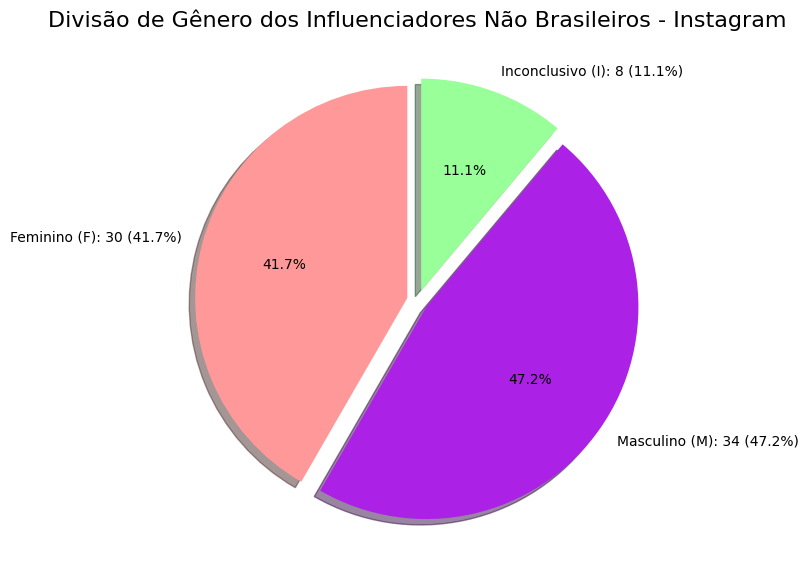

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV df_instagram2
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Renomear a coluna 'Authentic engagement\n' para 'Authentic engagement'
df_instagram2 = df_instagram2.rename(columns={'Authentic engagement\n': 'Authentic engagement'})

# Filtrar todas as contas cujo público é majoritariamente do Brasil e NÃO são brasileiros
df_instagram_non_brazilian = df_instagram2[(df_instagram2['Audience country(mostly)'] == 'Brazil') & (df_instagram2['Brazilian'] == 'N')]

# Contar quantos são do gênero feminino, masculino e inconclusivo
female_count = df_instagram_non_brazilian[df_instagram_non_brazilian['Gender'] == 'F'].shape[0]
male_count = df_instagram_non_brazilian[df_instagram_non_brazilian['Gender'] == 'M'].shape[0]
inconclusive_count = df_instagram_non_brazilian[df_instagram_non_brazilian['Gender'] == 'I'].shape[0]

# Total de não brasileiros
total_non_brazilian = female_count + male_count + inconclusive_count

# Dados para o gráfico de pizza
labels = [
    f'Feminino (F): {female_count} ({(female_count / total_non_brazilian) * 100:.1f}%)',
    f'Masculino (M): {male_count} ({(male_count / total_non_brazilian) * 100:.1f}%)',
    f'Inconclusivo (I): {inconclusive_count} ({(inconclusive_count / total_non_brazilian) * 100:.1f}%)'
]
sizes = [female_count, male_count, inconclusive_count]
colors = ['#ff9999', '#ac21e6', '#99ff99']  # Cores para as fatias
explode = (0.05, 0.05, 0.05)  # Destacar todas as fatias

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

# Adicionar título
plt.title('Divisão de Gênero dos Influenciadores Não Brasileiros - Instagram', fontsize=16)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


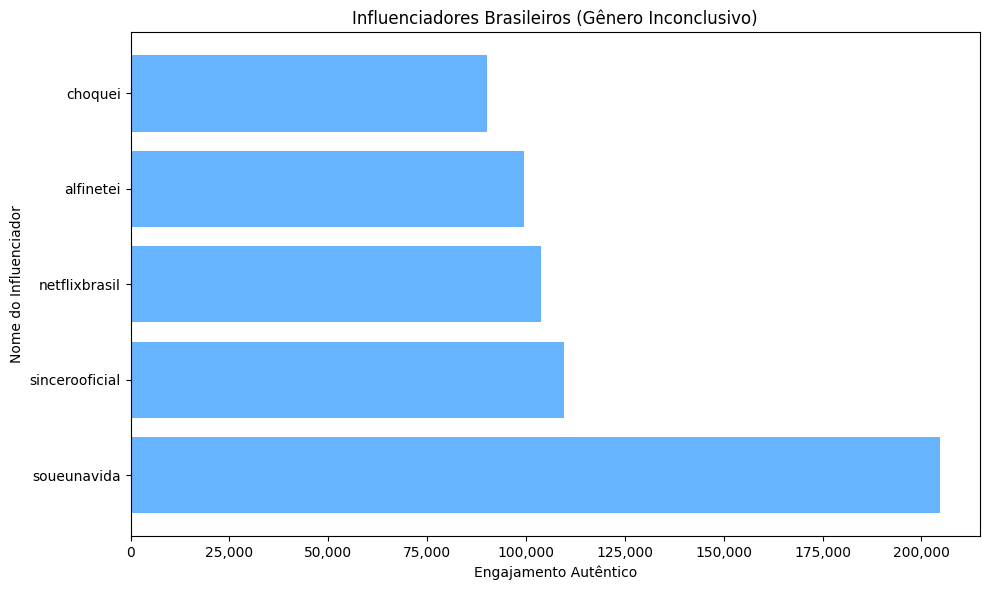

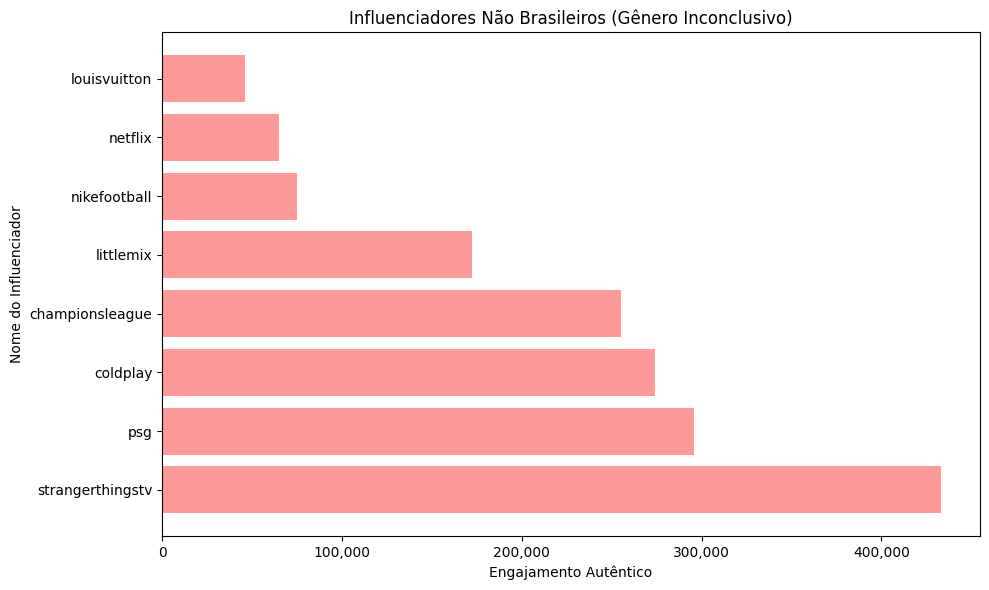

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV df_instagram2
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Renomear a coluna 'Authentic engagement\n' para 'Authentic engagement'
df_instagram2 = df_instagram2.rename(columns={'Authentic engagement\n': 'Authentic engagement'})

# Converter os valores de 'Authentic engagement' para numéricos
df_instagram2['Authentic engagement'] = df_instagram2['Authentic engagement'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)

# Filtrar as contas cujo público é majoritariamente do Brasil e que são inconclusivas (Gender = 'I')
df_inconclusive_brazilian = df_instagram2[(df_instagram2['Audience country(mostly)'] == 'Brazil') & (df_instagram2['Brazilian'] == 'Y') & (df_instagram2['Gender'] == 'I')]
df_inconclusive_non_brazilian = df_instagram2[(df_instagram2['Audience country(mostly)'] == 'Brazil') & (df_instagram2['Brazilian'] == 'N') & (df_instagram2['Gender'] == 'I')]

# Ordenar os influenciadores por engajamento autêntico
df_inconclusive_brazilian_sorted = df_inconclusive_brazilian.sort_values(by='Authentic engagement', ascending=False)
df_inconclusive_non_brazilian_sorted = df_inconclusive_non_brazilian.sort_values(by='Authentic engagement', ascending=False)

# Gráfico de influenciadores inconclusivos brasileiros (ordenados)
plt.figure(figsize=(10, 6))
plt.barh(df_inconclusive_brazilian_sorted['Influencer insta name'], df_inconclusive_brazilian_sorted['Authentic engagement'], color='#66b3ff')
plt.xlabel('Engajamento Autêntico')
plt.ylabel('Nome do Influenciador')
plt.title('Influenciadores Brasileiros (Gênero Inconclusivo)')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Formatar eixo X
plt.show()

# Gráfico de influenciadores inconclusivos não brasileiros (ordenados)
plt.figure(figsize=(10, 6))
plt.barh(df_inconclusive_non_brazilian_sorted['Influencer insta name'], df_inconclusive_non_brazilian_sorted['Authentic engagement'], color='#ff9999')
plt.xlabel('Engajamento Autêntico')
plt.ylabel('Nome do Influenciador')
plt.title('Influenciadores Não Brasileiros (Gênero Inconclusivo)')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Formatar eixo X
plt.show()






category_1
Accessories & Jewellery      5.790000e+04
Adult content                2.742000e+05
Animals                      2.715000e+05
Art/Artists                  4.939917e+05
Beauty                       4.238071e+05
Business & Careers           8.096000e+05
Cars & Motorbikes            1.454800e+05
Cinema & Actors/actresses    5.909178e+05
Clothing & Outfits           6.076800e+05
Computers & Gadgets          5.086778e+05
Education                    4.242000e+05
Family                       4.511273e+05
Fashion                      1.312878e+06
Finance & Economics          4.179000e+05
Fitness & Gym                3.792900e+05
Food & Cooking               3.884667e+05
Humor & Fun & Happiness      3.890389e+05
Kids & Toys                  1.764000e+05
Lifestyle                    5.803727e+05
Literature & Journalism      2.177667e+05
Luxury                       1.744000e+05
Machinery & Technologies     0.000000e+00
Management & Marketing       1.900000e+06
Modeling               

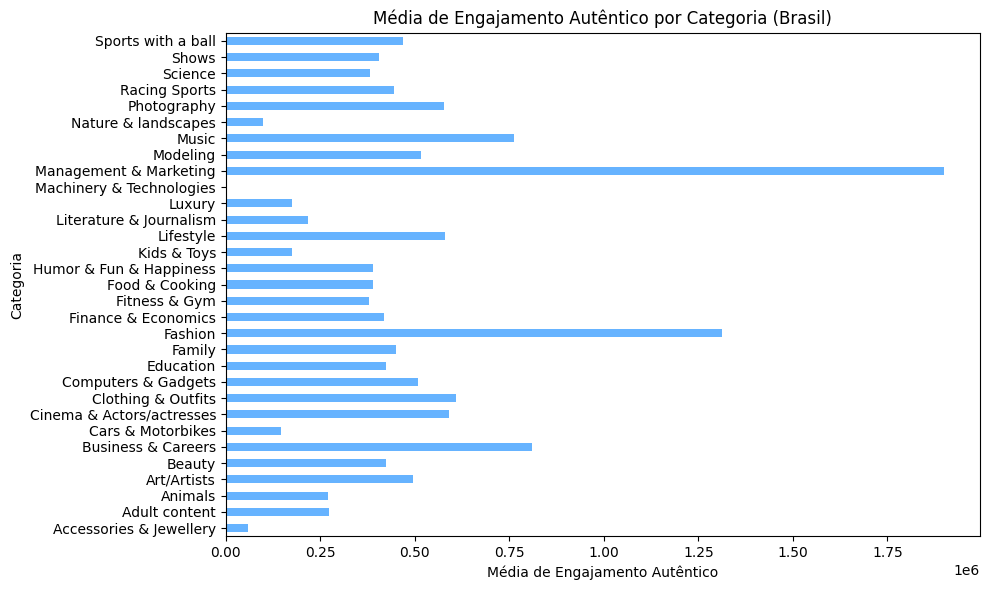

In [ ]:
#Média de Engajamento por Categoria
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a média de engajamento por categoria
media_engajamento_categoria = df_instagram2.groupby('category_1')['Authentic engagement'].mean()

# Exibir a média de engajamento por categoria
print(media_engajamento_categoria)

# Criar o gráfico de barras para a média de engajamento por categoria
plt.figure(figsize=(10, 6))
media_engajamento_categoria.plot(kind='barh', color='#66b3ff')
plt.xlabel('Média de Engajamento Autêntico')
plt.ylabel('Categoria')
plt.title('Média de Engajamento Autêntico por Categoria (Brasil)')
plt.tight_layout()
plt.show()



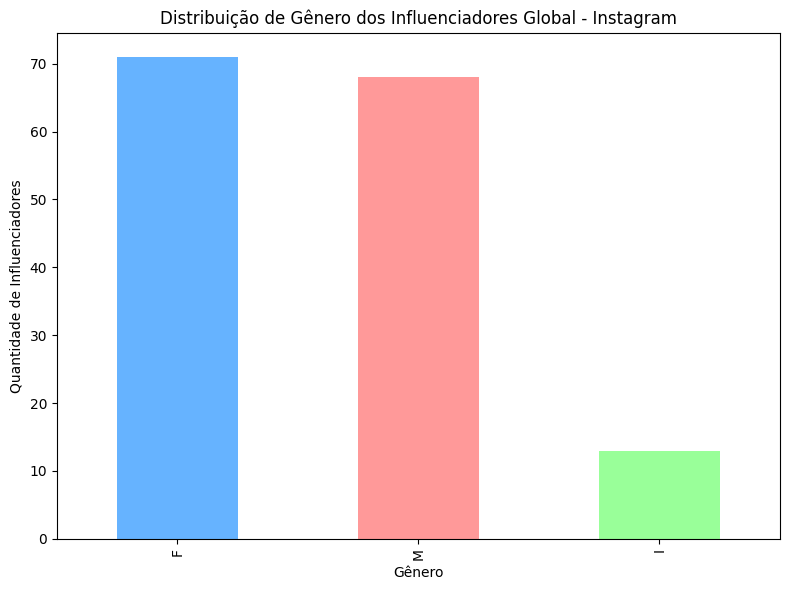

In [ ]:
# Contar influenciadores por gênero (F, M, In)
gender_distribution = df_instagram2['Gender'].value_counts()

# Gráfico de barras da distribuição de gênero
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar', color=['#66b3ff', '#ff9999', '#99ff99'])
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Influenciadores')
plt.title('Distribuição de Gênero dos Influenciadores Global - Instagram')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Carregar o arquivo CSV df_instagram2
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None  # Caso haja valores inválidos, retorna None

# Aplicar a função de conversão de valores para 'Authentic engagement\n'
df_instagram2['Authentic engagement\n'] = df_instagram2['Authentic engagement\n'].apply(convert_to_numeric)

# Filtrar influenciadores cujo público é majoritariamente do Brasil
df_instagram_brazil = df_instagram2[df_instagram2['Audience country(mostly)'] == 'Brazil']

# Filtrar para as mulheres
df_women = df_instagram_brazil[df_instagram_brazil['Gender'] == 'F']

# Filtrar para os homens
df_men = df_instagram_brazil[df_instagram_brazil['Gender'] == 'M']

# Agrupar por categoria e calcular o engajamento total para as mulheres
engajamento_women = df_women.groupby('category_1')['Authentic engagement\n'].sum().sort_values(ascending=False)

# Agrupar por categoria e calcular o engajamento total para os homens
engajamento_men = df_men.groupby('category_1')['Authentic engagement\n'].sum().sort_values(ascending=False)

# Exibir os tópicos mais engajados para mulheres
print("Tópicos mais engajados das influenciadores femininas (Brasil):")
print(engajamento_women.head(10).to_string())

# Exibir os tópicos mais engajados para homens
print("\nTópicos mais engajados dos influenciadores masculinos (Brasil):")
print(engajamento_men.head(10).to_string())



Tópicos mais engajados das influenciadores femininas (Brasil):
category_1
Cinema & Actors/actresses   11,667,000.00
Music                        8,992,000.00
Shows                        2,979,200.00
Modeling                     2,823,800.00
Lifestyle                    1,464,800.00
Beauty                         691,800.00
Sports with a ball             373,800.00
Art/Artists                    320,400.00
Adult content                  212,900.00

Tópicos mais engajados dos influenciadores masculinos (Brasil):
category_1
Music                       8,687,100.00
Cinema & Actors/actresses   7,456,200.00
Sports with a ball          4,615,000.00
Lifestyle                   3,700,400.00
Management & Marketing      1,800,000.00
Humor & Fun & Happiness     1,520,600.00
Racing Sports                 819,900.00
Shows                         382,900.00
Literature & Journalism       234,300.00
Finance & Economics           150,900.00


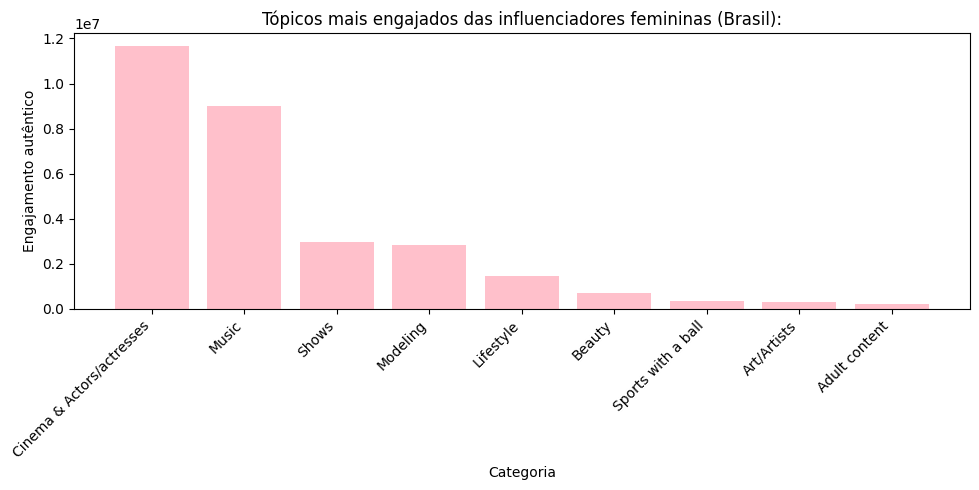

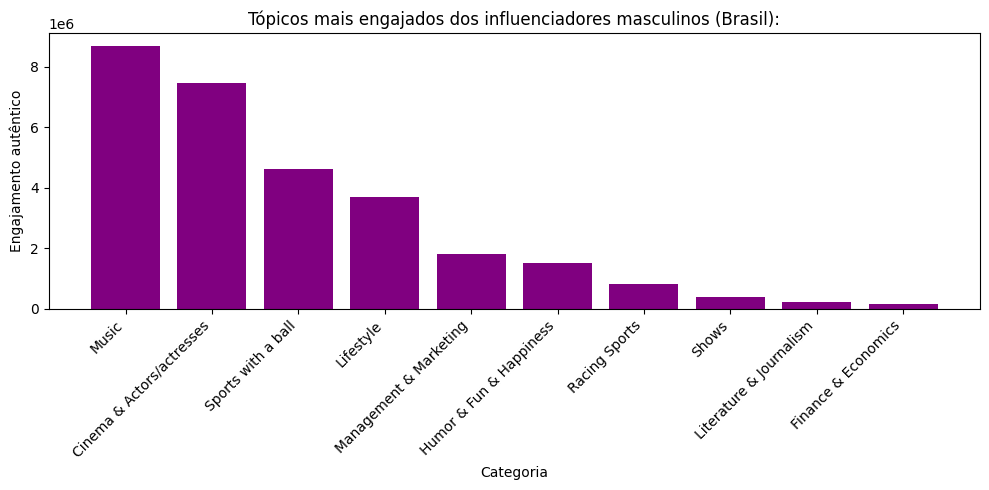

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os arquivos CSV
df_instagram = pd.read_csv('social media influencers - instagram2.csv')

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None  # Caso haja valores inválidos, retorna None

# Aplicar a função de conversão de valores para 'Authentic engagement\n'
df_instagram2['Authentic engagement\n'] = df_instagram2['Authentic engagement\n'].apply(convert_to_numeric)

# Filtrar influenciadores cujo público é majoritariamente do Brasil
df_instagram_brazil = df_instagram2[df_instagram2['Audience country(mostly)'] == 'Brazil']

# Filtrar para as mulheres
df_women = df_instagram_brazil[df_instagram_brazil['Gender'] == 'F']

# Filtrar para os homens
df_men = df_instagram_brazil[df_instagram_brazil['Gender'] == 'M']

# Agrupar por categoria e calcular o engajamento total para as mulheres
engajamento_women = df_women.groupby('category_1')['Authentic engagement\n'].sum().sort_values(ascending=False)

# Agrupar por categoria e calcular o engajamento total para os homens
engajamento_men = df_men.groupby('category_1')['Authentic engagement\n'].sum().sort_values(ascending=False)

# Plotando o gráfico para mulheres
plt.figure(figsize=(10, 5))
plt.bar(engajamento_women.head(10).index, engajamento_women.head(10).values, color='pink')
plt.xticks(rotation=45, ha='right')
plt.title("Tópicos mais engajados das influenciadores femininas (Brasil):")
plt.ylabel("Engajamento autêntico")
plt.xlabel("Categoria")
plt.tight_layout()
plt.show()

# Plotando o gráfico para homens
plt.figure(figsize=(10, 5))
plt.bar(engajamento_men.head(10).index, engajamento_men.head(10).values, color='purple')
plt.xticks(rotation=45, ha='right')
plt.title("Tópicos mais engajados dos influenciadores masculinos (Brasil):")
plt.ylabel("Engajamento autêntico")
plt.xlabel("Categoria")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para converter os valores de seguidores de 'K' para mil e 'M' para milhões
def convert_followers(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None

# Aplicar a função de conversão para a coluna de 'Followers'
df_instagram2['Followers'] = df_instagram2['Followers'].apply(convert_followers)

# Filtrar influenciadores cujo público é majoritariamente do Brasil
df_instagram_brazil = df_instagram2[df_instagram2['Audience country(mostly)'] == 'Brazil']

# Definir faixas de seguidores conforme os novos limites
bins = [0, 500000, 1000000, 5000000, 10000000, 100000000]
labels = ['Micro (<500K)', 'Small (500K-1M)', 'Medium (1M-5M)', 'Large (5M-10M)', 'Mega (>10M)']
df_instagram_brazil['Follower Range'] = pd.cut(df_instagram_brazil['Followers'], bins=bins, labels=labels)

# Calcular a média de engajamento para cada faixa de seguidores
engajamento_por_faixa = df_instagram_brazil.groupby('Follower Range')['Authentic engagement'].mean()

# Exibir a média de engajamento por faixa
print(engajamento_por_faixa)

# Criar o gráfico de barras para a média de engajamento por faixa de seguidores
plt.figure(figsize=(10, 6))
engajamento_por_faixa.plot(kind='bar', color='#66b3ff')
plt.xlabel('Faixa de Seguidores')
plt.ylabel('Média de Engajamento Autêntico')
plt.title('Média de Engajamento por Faixa de Seguidores (Influenciadores Brasileiros)')
plt.tight_layout()
plt.show()


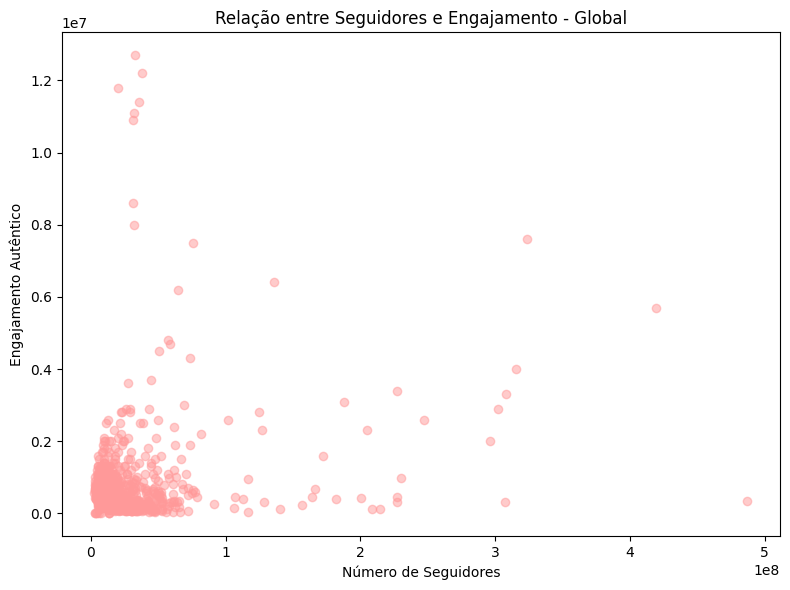

In [ ]:
# Gráfico de dispersão (scatter plot) para seguidores vs engajamento - global
plt.figure(figsize=(8, 6))
plt.scatter(df_instagram2['Followers'], df_instagram2['Authentic engagement'], alpha=0.5, color='#ff9999')
plt.xlabel('Número de Seguidores')
plt.ylabel('Engajamento Autêntico')
plt.title('Relação entre Seguidores e Engajamento - Global')
plt.tight_layout()
plt.show()


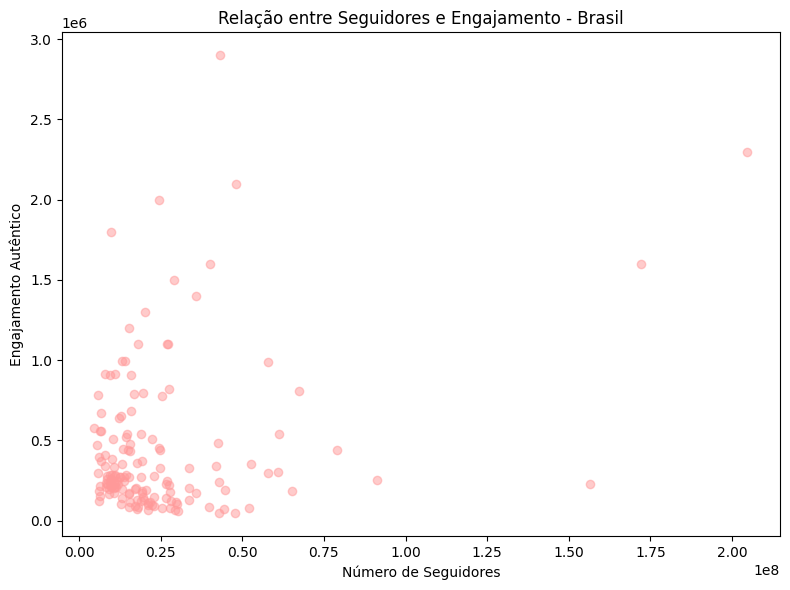

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar influenciadores cujo público é majoritariamente do Brasil
df_instagram_brazil = df_instagram2[df_instagram2['Audience country(mostly)'] == 'Brazil']

# Gráfico de dispersão (scatter plot) para seguidores vs engajamento (somente influenciadores do Brasil)
plt.figure(figsize=(8, 6))
plt.scatter(df_instagram_brazil['Followers'], df_instagram_brazil['Authentic engagement'], alpha=0.5, color='#ff9999')
plt.xlabel('Número de Seguidores')
plt.ylabel('Engajamento Autêntico')
plt.title('Relação entre Seguidores e Engajamento - Brasil')
plt.tight_layout()
plt.show()


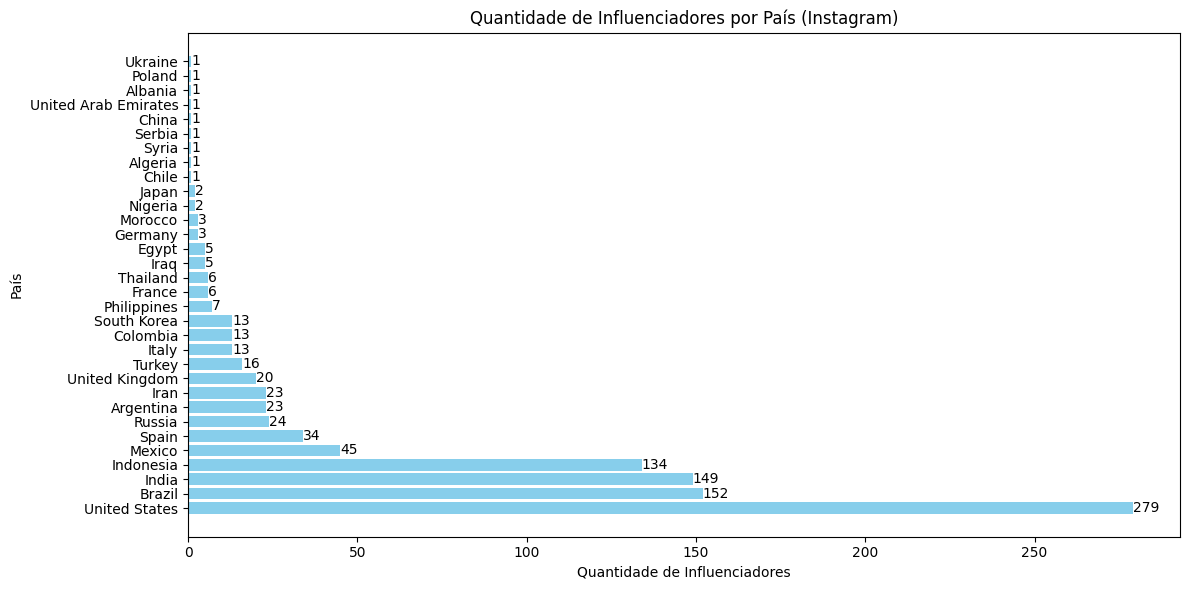

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV df_instagram2
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Contar a quantidade de influenciadores por país (coluna 'Audience country(mostly)')
country_counts = df_instagram2['Audience country(mostly)'].value_counts()

# Criar o gráfico de barras para exibir a quantidade de influenciadores por país
plt.figure(figsize=(12, 6))
plt.barh(country_counts.index, country_counts.values, color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Quantidade de Influenciadores')
plt.ylabel('País')
plt.title('Quantidade de Influenciadores por País (Instagram)')

# Exibir os valores nas barras
for index, value in enumerate(country_counts.values):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()


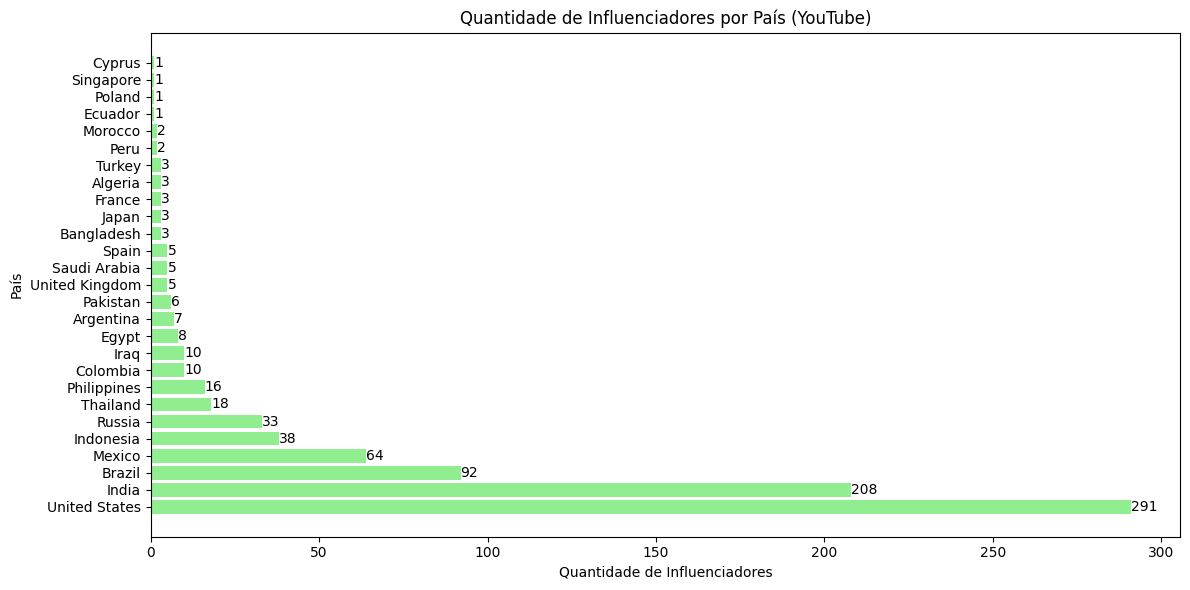

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV do YouTube
df_youtube = pd.read_csv('social media influencers - youtube.csv')

# Contar a quantidade de influenciadores por país (coluna 'Audience Country')
country_counts_youtube = df_youtube['Audience Country'].value_counts()

# Criar o gráfico de barras para exibir a quantidade de influenciadores por país
plt.figure(figsize=(12, 6))
plt.barh(country_counts_youtube.index, country_counts_youtube.values, color='lightgreen')

# Adicionar rótulos e título
plt.xlabel('Quantidade de Influenciadores')
plt.ylabel('País')
plt.title('Quantidade de Influenciadores por País (YouTube)')

# Exibir os valores nas barras
for index, value in enumerate(country_counts_youtube.values):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()


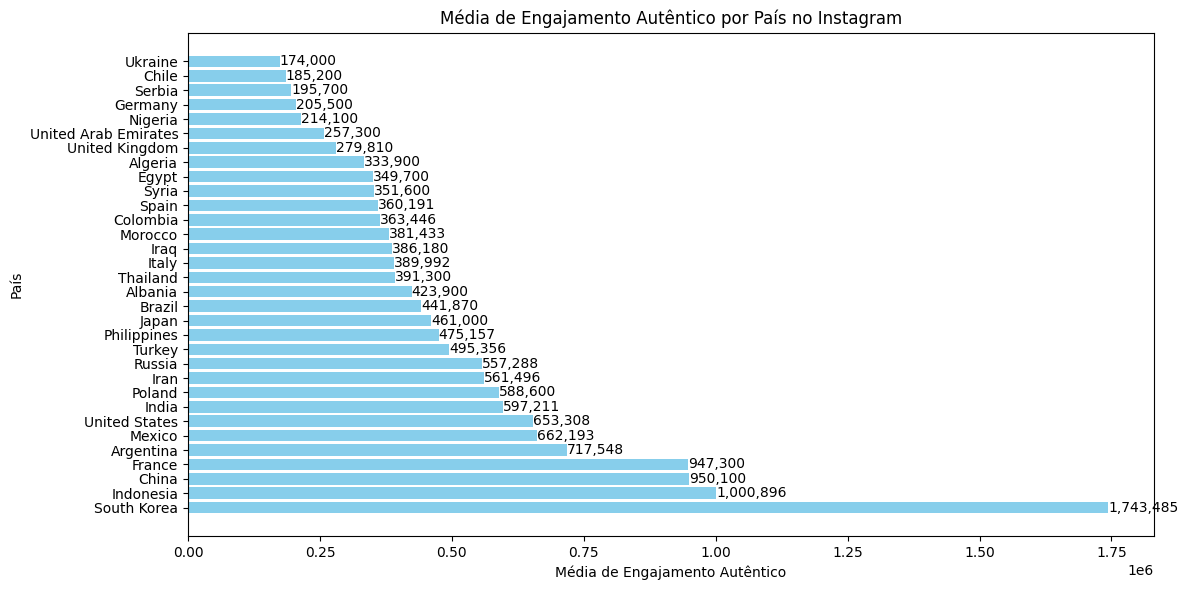

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV df_instagram2
df_instagram2 = pd.read_csv('social media influencers - instagram2.csv')

# Função para converter os valores de string 'K' para mil e 'M' para milhões
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas, se houver
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        return None

# Aplicar a função de conversão de valores para 'Authentic engagement\n'
df_instagram2['Authentic engagement\n'] = df_instagram2['Authentic engagement\n'].apply(convert_to_numeric)

# Calcular a média de engajamento autêntico por país e ordenar em ordem decrescente
media_engajamento_pais = df_instagram2.groupby('Audience country(mostly)')['Authentic engagement\n'].mean().dropna().sort_values(ascending=False)

# Criar o gráfico de barras para exibir a média de engajamento por país
plt.figure(figsize=(12, 6))
plt.barh(media_engajamento_pais.index, media_engajamento_pais.values, color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Média de Engajamento Autêntico')
plt.ylabel('País')
plt.title('Média de Engajamento Autêntico por País no Instagram')

# Exibir os valores nas barras
for index, value in enumerate(media_engajamento_pais.values):
    plt.text(value, index, f'{value:,.0f}', va='center')

plt.tight_layout()
plt.show()


Países com maior engajamento autêntico:
Audience country(mostly)
United States   182,272,800.00
Indonesia       134,120,100.00
India            88,984,400.00
Brazil           67,164,300.00
Mexico           29,798,700.00
South Korea      22,665,300.00
Argentina        16,503,600.00
Russia           13,374,900.00
Iran             12,914,400.00
Spain            12,246,500.00


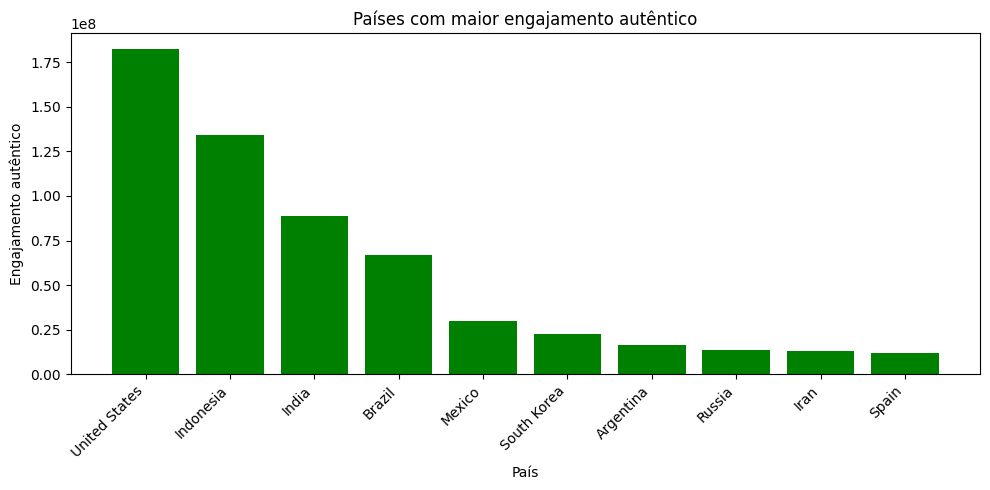

In [ ]:
# Agrupar por país e calcular o engajamento total
engajamento_pais = df_instagram2.groupby('Audience country(mostly)')['Authentic engagement\n'].sum().sort_values(ascending=False)

# Exibir os 10 países com maior engajamento
print("Países com maior engajamento autêntico:")
print(engajamento_pais.head(10).to_string())

# Plotar gráfico dos 10 países com maior engajamento
plt.figure(figsize=(10, 5))
plt.bar(engajamento_pais.head(10).index, engajamento_pais.head(10).values, color='green')
plt.xticks(rotation=45, ha='right')
plt.title("Países com maior engajamento autêntico")
plt.ylabel("Engajamento autêntico")
plt.xlabel("País")
plt.tight_layout()
plt.show()
